## Preprocessing Copy Number

In [1]:
PATH_FOLDER_COPY_NUMBER = "/work/h2020deciderficarra_shared/TCGA/OV/project_n16_data/CopyNumber"
PATH_CASE_ID_STRUCTURE = "./case_id_and_structure.json"

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import torch
import json
import os
import seaborn as sns

with open(PATH_CASE_ID_STRUCTURE, 'r') as file:
    file_parsed = json.load(file)

copy_number_folder_list = []
os_list = []
for key in file_parsed.keys():
    copy_number_folder_list.append(file_parsed[key]["files"]["copy_number"])
    os_list.append(file_parsed[key]['os'])
        

In [29]:
os_list

[1815,
 951,
 361,
 1163,
 25,
 1213,
 895,
 1380,
 681,
 2742,
 75,
 568,
 1161,
 820,
 2218,
 1767,
 462,
 11,
 1366,
 1579,
 2400,
 1319,
 676,
 83,
 394,
 629,
 3260,
 1721,
 962,
 84,
 1516,
 608,
 949,
 1562,
 627,
 304,
 608,
 1114,
 2089,
 1947,
 346,
 260,
 919,
 952,
 2028,
 1324,
 547,
 204,
 1355,
 728,
 1511,
 1082,
 637,
 731,
 138,
 506,
 1446,
 840,
 3337,
 365,
 1446,
 1499,
 701,
 3224,
 528,
 1384,
 1720,
 377,
 787,
 8,
 637,
 1091,
 1169,
 1000,
 53,
 2467,
 1155,
 1058,
 479,
 524,
 1699,
 1059,
 515,
 379,
 1891,
 2342,
 2688,
 1955,
 1279,
 1483,
 1736,
 542,
 1875,
 887,
 2490,
 65,
 1064,
 788,
 31,
 563,
 885,
 2561,
 1158,
 1583,
 857,
 90,
 197,
 1583,
 2148,
 395,
 883,
 74,
 1492,
 690,
 1646,
 2097,
 1189,
 1484,
 354,
 3622,
 457,
 129,
 1247,
 189,
 730,
 455,
 949,
 91,
 2692,
 1102,
 594,
 1123,
 1484,
 1442,
 1033,
 1106,
 2717,
 61,
 2154,
 61,
 1229,
 555,
 1341,
 679,
 1336,
 1757,
 629,
 583,
 1104,
 871,
 820,
 1103,
 1348,
 1018,
 92,
 186,
 1

### Get relevant Gene List and Filter

In [16]:
gene_id_list = []
with open('./gene_id_protein_coding.json') as json_file:
   gene_id_list = json.load(json_file)
print(len(gene_id_list))

20092


In [17]:
def remove_version(x):
    if '.' in x:
        return x.split('.')[0]
    return x

list_df_CNV = []
for root, dirs, files in os.walk(PATH_FOLDER_COPY_NUMBER):
    for dir in dirs:
        for root, dirs, files in os.walk(PATH_FOLDER_COPY_NUMBER + "/" + dir):
            for file in files:
                if file in copy_number_folder_list:
                    parsed_file = pd.read_csv(PATH_FOLDER_COPY_NUMBER + "/" + dir + "/" + file, sep='\t')
                    parsed_file['gene_id'] = parsed_file['gene_id'].apply(remove_version)
                    parsed_file = parsed_file[parsed_file['gene_id'].isin(gene_id_list)]
                    list_df_CNV.append(parsed_file)


In [ ]:
# import re

# gtf_file_path = '/work/h2020deciderficarra_shared/TCGA/OV/project_n16_data/gencode.v47.annotation.gtf'
# gtf = pd.read_csv(gtf_file_path, sep="\t", header=None, comment='#')
# gtf.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']

# parameters = ['gene_id', 'gene_type']
# for p in parameters:
#     gtf[p] = gtf['attribute'].apply(lambda x: re.findall(rf'{p} "([^"]*)"', x)[0] if rf'{p} "' in x else np.nan)
# gtf.drop('attribute', axis=1, inplace=True)

# gtf['gene_id'] = gtf['gene_id'].apply(remove_version)

# gtf_pc = gtf[gtf['gene_type'] == 'protein_coding']

# # Protein coding set
# pc_set = set(gtf_pc['gene_id'].to_list())

{1546, 1550, 1552, 1557, 27, 28, 29, 30, 1564, 32, 33, 31, 1563, 1572, 37, 38, 1568, 1576, 1577, 1578, 36, 1580, 1585, 1587, 1588, 53, 1591, 1593, 1598, 1602, 69, 70, 71, 72, 73, 1610, 74, 1618, 1621, 1626, 1639, 1642, 1645, 1646, 1652, 1656, 1673, 1676, 1678, 1683, 1696, 1708, 1709, 1736, 1748, 1761, 1765, 1805, 1423, 1440, 1443, 1444, 1450, 1458, 1466, 1468, 1472, 1483, 1486, 1487, 1488, 1493, 1501, 1502, 1503, 1504, 1513, 1516, 1522, 1526, 1527, 1531, 1532, 1534}


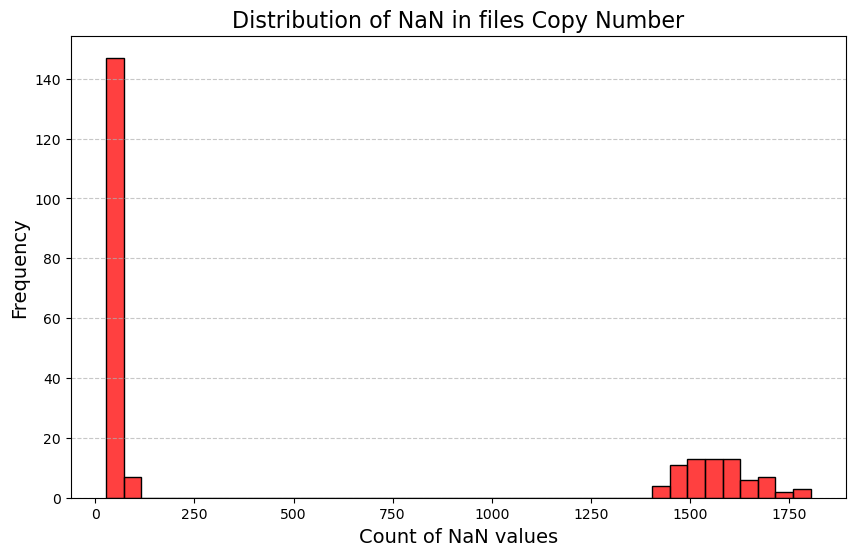

In [23]:
list_NaN = []
for i in range(len(list_df_CNV)):
    list_NaN.append(list_df_CNV[i]['copy_number'].isnull().sum())
print(set(list_NaN))

plt.figure(figsize=(10, 6))
sns.histplot(list_NaN, bins=40, kde=False, color="red")
plt.title("Distribution of NaN in files Copy Number", fontsize=16)
plt.xlabel("Count of NaN values", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
list_df_CNV[0].head()

,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number
8,ENSG00000186092,OR4F5,chr1,65419,71585,1.0,1.0,1.0
27,ENSG00000284733,OR4F29,chr1,450703,451697,1.0,1.0,1.0
42,ENSG00000284662,OR4F16,chr1,685679,686673,1.0,1.0,1.0
61,ENSG00000187634,SAMD11,chr1,923928,944581,1.0,1.0,1.0
62,ENSG00000188976,NOC2L,chr1,944203,959309,1.0,1.0,1.0


In some occasions, one gene may overlap with more than one segment. In this case, min_copy_number is the minimum value of all segments it overlaps, max_copy_number is the maximum value of all segments it overlaps, and copy_number is calculated as the weighted (on length of overlapped regions) median of copy number values from all overlapped segments. When there is a tie (very rare), the smaller number is used. If a gene overlaps with only one segment, copy_number = min_copy_number = max_copy_number. If a gene overlaps with no segments, the gene gets empty value "" in copy_number, min_copy_number and max_copy_number. [GDC documentation](https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/CNV_Pipeline/)

### The missing values are going to be filled with 0 value

In [25]:
list_df_CNV_filled = []
for i in range(len(list_df_CNV)):
    list_df_CNV_filled.append(list_df_CNV[i].fillna(0))

In [28]:
list_df_CNV_filled[1].head()

,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number
8,ENSG00000186092,OR4F5,chr1,65419,71585,3.0,3.0,3.0
27,ENSG00000284733,OR4F29,chr1,450703,451697,3.0,3.0,3.0
42,ENSG00000284662,OR4F16,chr1,685679,686673,3.0,3.0,3.0
61,ENSG00000187634,SAMD11,chr1,923928,944581,3.0,3.0,3.0
62,ENSG00000188976,NOC2L,chr1,944203,959309,3.0,3.0,3.0


In [27]:
print(list_df_CNV_filled[0].isna().sum())  # Verifica che non ci siano più valori NaN

gene_id            0
gene_name          0
chromosome         0
start              0
end                0
copy_number        0
min_copy_number    0
max_copy_number    0
dtype: int64


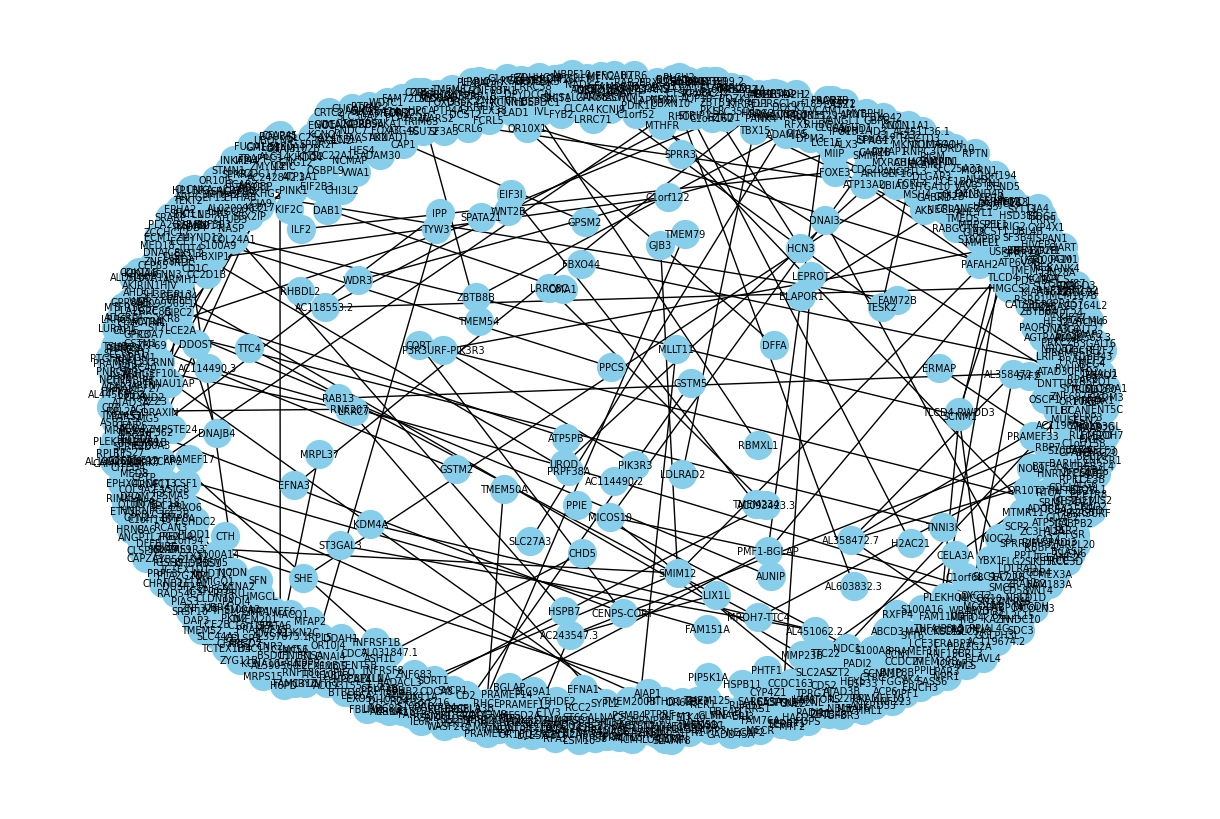

In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import to_networkx, from_networkx

def find_overlapping_genes(df_CNV):
    """
    Trova in modo efficiente le coppie di geni che si sovrappongono.
    """
    # Ordina il dataframe per cromosoma e posizione di inizio
    df_CNV = df_CNV.sort_values(['chromosome', 'start'])
    overlapping_pairs = []
    
    # Raggruppa per cromosoma
    for chrom, group in df_CNV.groupby('chromosome'):
        genes = group.to_dict('records')
        active = []
        
        for gene in genes:
            # Rimuovi i geni che non possono più sovrapporsi
            active = [g for g in active if g['end'] >= gene['start']]
            
            # Aggiungi collegamenti per le sovrapposizioni
            for active_gene in active:
                if active_gene['start'] <= gene['end']:
                    overlapping_pairs.append((active_gene['gene_name'], gene['gene_name']))
            
            active.append(gene)
    
    return overlapping_pairs

"""
Crea grafi per ogni caso nel dataset.
"""
list_of_Data = []
for case_index in range(1): 
    df_CNV = list_df_CNV_filled[case_index][:1000]
    
    # Crea un grafo vuoto
    G = nx.Graph()
    
    # Aggiungi i nodi con i loro attributi
    nodes_data = {row['gene_name']: {'x': row['copy_number']} 
                 for _, row in df_CNV.iterrows()}
    G.add_nodes_from(nodes_data.items())
    
    # Trova e aggiungi gli archi per i geni sovrapposti
    overlapping_pairs = find_overlapping_genes(df_CNV)
    G.add_edges_from(overlapping_pairs)
    # Converti in PyTorch Geometric graph
    pyg_graph = from_networkx(G)
    pyg_graph['y'] = torch.tensor([os_list[case_index]])
    list_of_Data.append(pyg_graph)

# Visualizza il grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G,k=0.5)  # Layout del grafo
#pos = nx.shell_layout(G)
#pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_size=400, node_color="skyblue", font_size=7, font_color="black")
plt.show()


In [38]:
# Numero di nodi (geni) e archi (relazioni di sovrapposizione)
print("Numero di nodi:", G.number_of_nodes())
print("Numero di archi:", G.number_of_edges())

# Grado di ciascun nodo (numero di connessioni per gene)
degrees = dict(G.degree())
print("Gradi dei nodi:", degrees)

# Nodo con il massimo grado (gene con più connessioni)
max_degree_node = max(degrees, key=degrees.get)
print(f"Gene con il massimo grado: {max_degree_node} ({degrees[max_degree_node]} connessioni)")

# Trova tutte le componenti connesse
connected_components = list(nx.connected_components(G))
print("Numero di componenti connesse:", len(connected_components))


Numero di nodi: 1000
Numero di archi: 147
Gradi dei nodi: {'NOC2L': 0, 'PLEKHN1': 0, 'HES4': 0, 'ISG15': 0, 'RNF223': 0, 'C1orf159': 0, 'TTLL10': 0, 'TNFRSF18': 0, 'B3GALT6': 0, 'C1QTNF12': 0, 'UBE2J2': 0, 'SCNN1D': 0, 'ACAP3': 0, 'CPTP': 0, 'TAS1R3': 0, 'MXRA8': 0, 'MRPL20': 0, 'VWA1': 0, 'ATAD3C': 0, 'ATAD3B': 0, 'ATAD3A': 0, 'SSU72': 0, 'FNDC10': 0, 'MMP23B': 1, 'CDK11B': 1, 'SLC35E2B': 0, 'CDK11A': 0, 'NADK': 0, 'CALML6': 0, 'TMEM52': 0, 'GABRD': 0, 'PRKCZ': 1, 'FAAP20': 1, 'MORN1': 0, 'RER1': 1, 'PEX10': 1, 'PLCH2': 0, 'PANK4': 0, 'HES5': 0, 'PRXL2B': 1, 'MMEL1': 1, 'ACTRT2': 0, 'PRDM16': 0, 'ARHGEF16': 0, 'TPRG1L': 0, 'WRAP73': 0, 'CCDC27': 0, 'SMIM1': 0, 'LRRC47': 0, 'CEP104': 1, 'DFFB': 1, 'AJAP1': 0, 'NPHP4': 0, 'CHD5': 1, 'AL031847.1': 2, 'RPL22': 2, 'RNF207': 2, 'ICMT': 1, 'GPR153': 0, 'HES2': 0, 'TNFRSF25': 0, 'PLEKHG5': 0, 'NOL9': 0, 'TAS1R1': 0, 'ZBTB48': 0, 'PHF13': 0, 'VAMP3': 0, 'UTS2': 0, 'PARK7': 0, 'ERRFI1': 0, 'SLC45A1': 0, 'ENO1': 0, 'CA6': 0, 'SLC2A5': 0, 'GPR157

In [ ]:
import matplotlib.pyplot as plt

# Assegna un colore a ogni componente connessa
color_map = {}
for i, component in enumerate(connected_components):
    for node in component:
        color_map[node] = i  # Assegna un ID colore per ogni componente

# Colori per i nodi
colors = [color_map[node] for node in G.nodes]

# Disegna il grafo con i colori delle componenti
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(
    G, pos, node_color=colors, with_labels=True, 
    node_size=700, cmap=plt.cm.tab10
)
plt.title("Componenti connesse nel grafo")
plt.show()


In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

# Trova comunità usando la modularità
communities = list(greedy_modularity_communities(G))
print("Numero di comunità trovate:", len(communities))

# Mostra le comunità
for i, community in enumerate(communities):
    print(f"Comunità {i + 1}: {sorted(community)}")


In [ ]:
# Assegna un colore a ogni comunità
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Colori per i nodi
community_colors = [community_map[node] for node in G.nodes]

# Disegna il grafo con i colori delle comunità
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, node_color=community_colors, with_labels=True, 
    node_size=700, cmap=plt.cm.Paired
)
plt.title("Comunità nel grafo")
plt.show()


In [ ]:
# Coefficiente di clustering globale
global_clustering = nx.average_clustering(G)
print("Coefficiente di clustering globale:", global_clustering)

# Coefficiente di clustering per ciascun nodo
clustering_per_node = nx.clustering(G)
print("Clustering per nodo:", clustering_per_node)

#Il coefficiente di clustering misura quanto un nodo è parte di una "triade",
# ovvero se i suoi vicini sono collegati tra loro.

Coefficiente di clustering globale: 0.01710714285714286
Clustering per nodo: {'NOC2L': 0, 'PLEKHN1': 0, 'HES4': 0, 'ISG15': 0, 'RNF223': 0, 'C1orf159': 0, 'TTLL10': 0, 'TNFRSF18': 0, 'B3GALT6': 0, 'C1QTNF12': 0, 'UBE2J2': 0, 'SCNN1D': 0, 'ACAP3': 0, 'CPTP': 0, 'TAS1R3': 0, 'MXRA8': 0, 'MRPL20': 0, 'VWA1': 0, 'ATAD3C': 0, 'ATAD3B': 0, 'ATAD3A': 0, 'SSU72': 0, 'FNDC10': 0, 'MMP23B': 0, 'CDK11B': 0, 'SLC35E2B': 0, 'CDK11A': 0, 'NADK': 0, 'CALML6': 0, 'TMEM52': 0, 'GABRD': 0, 'PRKCZ': 0, 'FAAP20': 0, 'MORN1': 0, 'RER1': 0, 'PEX10': 0, 'PLCH2': 0, 'PANK4': 0, 'HES5': 0, 'PRXL2B': 0, 'MMEL1': 0, 'ACTRT2': 0, 'PRDM16': 0, 'ARHGEF16': 0, 'TPRG1L': 0, 'WRAP73': 0, 'CCDC27': 0, 'SMIM1': 0, 'LRRC47': 0, 'CEP104': 0, 'DFFB': 0, 'AJAP1': 0, 'NPHP4': 0, 'CHD5': 0, 'AL031847.1': 0, 'RPL22': 0, 'RNF207': 0, 'ICMT': 0, 'GPR153': 0, 'HES2': 0, 'TNFRSF25': 0, 'PLEKHG5': 0, 'NOL9': 0, 'TAS1R1': 0, 'ZBTB48': 0, 'PHF13': 0, 'VAMP3': 0, 'UTS2': 0, 'PARK7': 0, 'ERRFI1': 0, 'SLC45A1': 0, 'ENO1': 0, 'CA6': 0, '

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool
import networkx as nx
from torch_geometric.utils.convert import to_networkx, from_networkx
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from collections import OrderedDict
from sklearn.metrics import accuracy_score

class simple_GCN(torch.nn.Module):
   def __init__(self, input_feature, hidden_channels, num_classes):
       super(simple_GCN, self).__init__()
       self.conv1 = GCNConv(input_feature, hidden_channels)
       self.conv2 = GCNConv(hidden_channels, hidden_channels)
       self.conv3 = GCNConv(hidden_channels, hidden_channels)
       self.lin = Linear(hidden_channels, num_classes)

   def forward(self, x, edge_index, batch):
       # 1. Obtain node embeddings 
       x = self.conv1(x, edge_index)
       x = x.relu()
       x = self.conv2(x, edge_index)
       x = x.relu()
       x = self.conv3(x, edge_index)

       # 2. Readout layer
       x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

       # 3. Apply a final classifier
       x = F.dropout(x, p=0.5, training=self.training)
       x = self.lin(x)
       
       return x

In [ ]:
hyperparameter = {
    'num_classes': 2,
    'epochs': 30,
    'batch_size': 10,
    'seed': 123456,
    'num_workers': 12,
    'lr': 0.01,
    'save_model_period': 10 # How many epoch to wait before save the next model.
}

torch.manual_seed(hyperparameter['seed'])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_train_list = list_of_Data[0:35]
data_test_list = list_of_Data[35:50]

train_loader = DataLoader(data_train_list, batch_size=hyperparameter['batch_size'], shuffle=True, num_workers=hyperparameter['num_workers'], pin_memory=True)
test_loader = DataLoader(data_test_list, batch_size=hyperparameter['batch_size'], shuffle=True, num_workers=hyperparameter['num_workers'], pin_memory=True)
# pin_memory=True will automatically put the fetched data Tensors in pinned memory, and thus enables faster data transfer to CUDA-enabled GPUs.
# https://pytorch.org/docs/stable/data.html.

node_feature_number = 1
model = simple_GCN(node_feature_number, 10, hyperparameter['num_classes'])
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=hyperparameter['lr'])
criterion = torch.nn.CrossEntropyLoss()
# Here you could also use a scheduler to validate the model.

def train(loader):
    model.train()
    losses = []
    all_label = []
    all_pred = []
    for data in loader:
        # Get the inputs and labels
        inputs, labels = data.x.unsqueeze(1).to(device), data.y.to(device)
        edge_index, batch = data.edge_index.to(device), data.batch.to(device)
        optimizer.zero_grad()

        # Forward
        outputs = model(inputs, edge_index, batch)
        if isinstance(outputs, list):
            outputs = outputs[0]

        # Compute the loss
        loss = criterion(outputs, labels.squeeze())
        losses.append(loss.item())
        
        # Compute the accuracy
        prediction = torch.max(outputs, 1)[1]
        all_label.extend(labels.squeeze())
        all_pred.extend(prediction)
        score = accuracy_score(labels.squeeze().cpu().data.squeeze().numpy(), prediction.cpu().data.squeeze().numpy())
        # Backward & optimize
        loss.backward()
        optimizer.step()

    # Compute the average loss & accuracy
    training_loss = sum(losses)/len(losses)
    all_label = torch.stack(all_label, dim=0)
    all_pred = torch.stack(all_pred, dim=0)
    training_acc = accuracy_score(all_label.squeeze().cpu().data.squeeze().numpy(), all_pred.cpu().data.squeeze().numpy())

    return training_loss, training_acc
    

def test(loader):
    model.eval()
    losses = []
    all_label = []
    all_pred = []

    with torch.no_grad():
        for data in loader:
            # get the inputs and labels
            inputs, labels = data.x.unsqueeze(1).to(device), data.y.to(device)

            # forward
            outputs = model(inputs, data.edge_index, data.batch)  
            pred = outputs.argmax(dim=1)  # Use the class with highest probability.

            # compute the loss
            loss = criterion(outputs, labels.squeeze())
            losses.append(loss.item())
            # collect labels & prediction
            prediction = torch.max(outputs, 1)[1]
            all_label.extend(labels.squeeze())
            all_pred.extend(prediction)

        # Compute the average loss & accuracy
        test_loss = sum(losses)/len(losses)
        all_label = torch.stack(all_label, dim=0)
        all_pred = torch.stack(all_pred, dim=0)
        test_acc = accuracy_score(all_label.squeeze().cpu().data.squeeze().numpy(), all_pred.cpu().data.squeeze().numpy())

        return test_loss, test_acc
s_epoch=0
for epoch_index in range(s_epoch, hyperparameter['epochs']):
    train_loss, train_acc = train(train_loader)
    # print(train_loss,train_acc)
    test_loss, test_acc = test(test_loader)
    # print(test_loss,test_acc)
    print(f'Epoch: {epoch_index:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
    
    

In [14]:
data_train_list = list_of_Data[0:35]
data_test_list = list_of_Data[35:50]

train_loader = DataLoader(data_train_list, batch_size=hyperparameter['batch_size'], shuffle=True, num_workers=hyperparameter['num_workers'], pin_memory=True)
test_loader = DataLoader(data_test_list, batch_size=hyperparameter['batch_size'], shuffle=True, num_workers=hyperparameter['num_workers'], pin_memory=True)

In [ ]:
for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data.edge_index)
    print()

In [42]:
import pandas as pd
import networkx as nx
import numpy as np
import os as Os
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import to_networkx, from_networkx

os = list(os_list)
os.sort()
n = len(os)
num_classes = 2
split_values = []

for c in range(1, num_classes + 1):
    if c == num_classes:
        split_values.append(os[len(os) - 1])
    else:
        index = (n // num_classes) * c
        split_values.append(os[index - 1])

def find_overlapping_genes(df_CNV):
    """
    Trova in modo efficiente le coppie di geni che si sovrappongono.
    """
    # Ordina il dataframe per cromosoma e posizione di inizio
    df_CNV = df_CNV.sort_values(['chromosome', 'start'])
    overlapping_pairs = []
    
    # Raggruppa per cromosoma
    for chrom, group in df_CNV.groupby('chromosome'):
        genes = group.to_dict('records')
        active = []
        
        for gene in genes:
            # Rimuovi i geni che non possono più sovrapporsi
            active = [g for g in active if g['end'] >= gene['start']]
            
            # Aggiungi collegamenti per le sovrapposizioni
            for active_gene in active:
                if active_gene['start'] <= gene['end']:
                    overlapping_pairs.append((active_gene['gene_name'], gene['gene_name']))
            
            active.append(gene)
    
    return overlapping_pairs

"""
Crea grafi per ogni caso nel dataset.
"""
list_of_Data = []
list_label = []
list_attribute = []
edges = [[],[]]
count = 0
for case_index in range(20): 
    df_CNV = list_df_CNV_filled[case_index][:100]

    # for i in range(len(df_CNV)):
    #     with open('./dataset/Copy_Number_graph_indicator.txt','a') as file:
    #         file.write(str(case_index)+'\n')

    if os_list[case_index] <= split_values[0]:
        list_label.append(0)
    else:
        list_label.append(1)

    # Crea un grafo vuoto
    G = nx.Graph()
    
    # Aggiungi i nodi con i loro attributi
    nodes_data = {row['gene_name']: {'x': row['copy_number']} 
                 for _, row in df_CNV.iterrows()}
    G.add_nodes_from(nodes_data.items())

    # Aggiunta delle connessioni in base alla sovrapposizione
    nodes = len(df_CNV)
    for f_1_index in range(count, nodes + count):
        for f_2_index in range(f_1_index + 1, nodes + count):
            row1 = df.iloc[f_1_index]
            row2 = df.iloc[f_2_index]
            if row1['chromosome'] == row2['chromosome']:  # Evita duplicati
                if not (row1['end'] < row2['start'] or row2['end'] < row1['start']):
                    edges[0].append(f_1_index)
                    edges[0].append(f_2_index)
                    edges[1].append(f_2_index)
                    edges[1].append(f_1_index)
                    # G.add_edge(row1['gene_name'], row2['gene_name'])

    count += nodes

    # list_attribute.append(row['copy_number'] for _, row in df_CNV.iterrows())
    for _, row in df_CNV.iterrows():
        list_attribute.append(row['copy_number'])
    
    # Trova e aggiungi gli archi per i geni sovrapposti
    #overlapping_pairs = find_overlapping_genes(df_CNV)
    #G.add_edges_from(overlapping_pairs)
    #pyg_graph = from_networkx(G)
    #pyg_graph['y'] = torch.tensor([os_list[case_index]])
    #list_of_Data.append(pyg_graph)

if not Os.path.exists('./dataset/Copy_Number_graph_labels.txt'):
    with open('./dataset/Copy_Number_graph_labels.txt','w') as file:
        for item in list_label:
            file.write(str(item)+'\n')

if not Os.path.exists('./dataset/Copy_Number_node_attributes.txt'):
    with open('./dataset/Copy_Number_node_attributes.txt','w') as file:
        for item in list_attribute:
            file.write(str(item)+'\n')

print(split_values)
# Stampa gli edges
print("edges =", len(edges[0]))


[1032, 4624]
edges = 604


In [47]:
with open('./dataset/Copy_Number_A.txt','w') as file:
    for i in range(len(edges[0])):
        file.write(str(edges[0][i])+', '+str(edges[1][i])+'\n')

In [74]:
print(os)
print(os_list)
print(list_attribute)
print(len(list_attribute))

[8, 9, 9, 11, 23, 24, 25, 31, 31, 36, 53, 61, 61, 65, 74, 75, 83, 84, 90, 91, 92, 129, 138, 186, 189, 197, 204, 260, 286, 304, 312, 336, 346, 351, 354, 361, 365, 377, 379, 394, 395, 396, 446, 455, 457, 462, 479, 493, 506, 515, 518, 524, 528, 542, 547, 555, 562, 563, 565, 568, 583, 594, 608, 608, 608, 627, 629, 629, 636, 637, 637, 663, 676, 676, 679, 679, 681, 690, 695, 701, 728, 730, 731, 737, 760, 787, 788, 820, 820, 821, 840, 857, 863, 871, 883, 885, 887, 895, 914, 919, 949, 949, 949, 951, 952, 962, 976, 1000, 1004, 1018, 1024, 1024, 1032, 1033, 1046, 1058, 1059, 1064, 1069, 1073, 1082, 1089, 1091, 1102, 1102, 1103, 1104, 1106, 1114, 1123, 1155, 1157, 1158, 1161, 1162, 1163, 1169, 1187, 1189, 1199, 1213, 1229, 1247, 1249, 1259, 1264, 1266, 1278, 1279, 1319, 1324, 1329, 1336, 1341, 1348, 1354, 1354, 1355, 1364, 1366, 1369, 1380, 1384, 1442, 1446, 1446, 1448, 1451, 1470, 1483, 1484, 1484, 1492, 1499, 1511, 1516, 1562, 1579, 1579, 1583, 1583, 1620, 1646, 1662, 1688, 1699, 1720, 1721, 17